# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import keras
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow import keras
import timeit
import random
import warnings
warnings.filterwarnings('ignore')
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
IMG_WIDTH=100
IMG_HEIGHT=100
img_folder1=r'/content/drive/MyDrive/recaptcha-dataset-main/Large/'

# Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Printing Random Images from the dataset

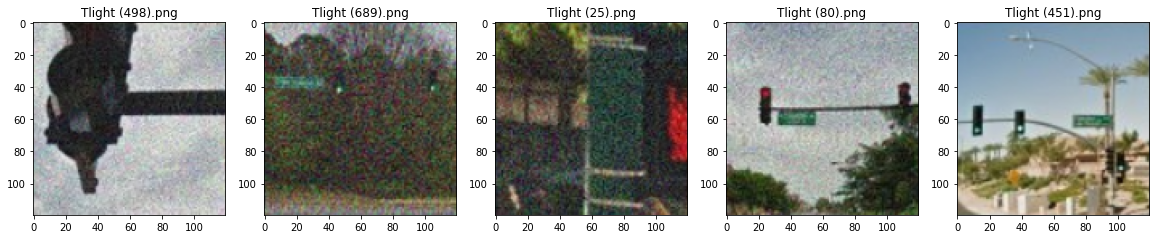

In [4]:
plt.figure(figsize=(20,20))
test_folder=r'/content/drive/MyDrive/recaptcha-dataset-main/Large/Traffic Light/'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Plotting the Number of Images from each subdivision

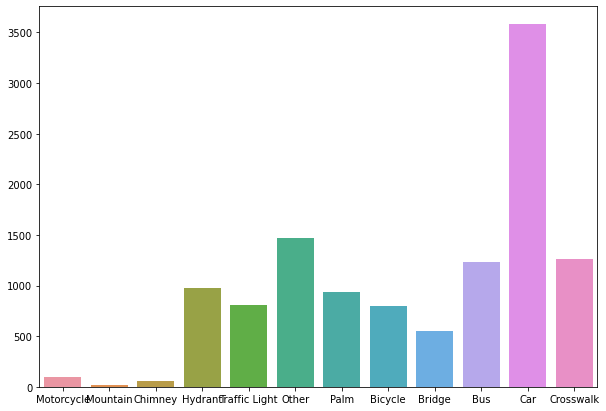

In [5]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
class_name = []
number_of_values = []  
for dir1 in os.listdir(img_folder1):
  i = 0
  for file in os.listdir(os.path.join(img_folder1, dir1)):
    i = i+1
    name = dir1
  class_name.append(name)
  number_of_values.append(i)
sns.barplot(class_name, number_of_values)

# Fetching Data from every class, Preprocessing it and storing it in a variable 

In [6]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
image_features, target =create_dataset(r'/content/drive/MyDrive/recaptcha-dataset-main/Large/')

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(target))}
print(target_dict)
final = []
for i in target_dict:
  final.append(i)
print(final)

{'Bicycle': 0, 'Bridge': 1, 'Bus': 2, 'Car': 3, 'Chimney': 4, 'Crosswalk': 5, 'Hydrant': 6, 'Motorcycle': 7, 'Mountain': 8, 'Other': 9, 'Palm': 10, 'Traffic Light': 11}
['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Other', 'Palm', 'Traffic Light']


In [8]:
target_val=  [target_dict[target[i]] for i in range(len(target))]

# Splitting the data into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(image_features, target_val, test_size=0.2, random_state=42)
X_train=np.array(X_train, np.float32)
X_test=np.array(X_test, np.float32)

In [10]:
img_rows = 100
img_cols = 100

# Converting the target variable to One hot encoding

In [11]:
# convert class vectors to binary class matrices
num_classes = len(target_dict)
print(len(target_dict))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
input_shape=(img_rows,img_cols,3)

12


# Building CNN Model

In [12]:
model = Sequential()
model.add(Conv2D(50,kernel_size=(3, 3), padding="same", activation="relu", strides=(1,1), input_shape=(img_rows,img_cols,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(70, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(70, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(30, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 50)      1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 70)        31570     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 70)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 70)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 70)        44170     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 70)        0

# Fitting the Train data

In [13]:
batch_size=128
epochs=8
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/8
74/74 [==============================] - 325s 4s/step - loss: 2.1536 - accuracy: 0.2726 - val_loss: 1.8639 - val_accuracy: 0.3338
Epoch 2/8
74/74 [==============================] - 308s 4s/step - loss: 1.7663 - accuracy: 0.3905 - val_loss: 1.5845 - val_accuracy: 0.4420
Epoch 3/8
74/74 [==============================] - 308s 4s/step - loss: 1.5359 - accuracy: 0.4535 - val_loss: 1.4484 - val_accuracy: 0.4998
Epoch 4/8
74/74 [==============================] - 309s 4s/step - loss: 1.3505 - accuracy: 0.5245 - val_loss: 1.3483 - val_accuracy: 0.5308
Epoch 5/8
74/74 [==============================] - 302s 4s/step - loss: 1.2086 - accuracy: 0.5716 - val_loss: 1.2529 - val_accuracy: 0.5631
Epoch 6/8
74/74 [==============================] - 299s 4s/step - loss: 1.0717 - accuracy: 0.6235 - val_loss: 1.2659 - val_accuracy: 0.5584
Epoch 7/8
74/74 [==============================] - 300s 4s/step - loss: 0.9519 - accuracy: 0.6602 - val_loss: 1.2708 - val_accuracy: 0.5843
Epoch 8/8
74/74 [===

# Testing with a random CAPTCHA image

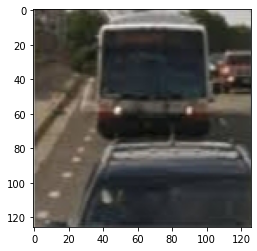

In [14]:
img_path = 'drive/MyDrive/IMG_20210529_145645.jpg'
img = image.load_img(img_path)
plt.imshow(img)
img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (100, 100),interpolation = cv2.INTER_AREA)
img = img.reshape((1,) + img.shape)  # shape = (1, 3, 250,250)
img= np.array(img)

img = img.astype('float32')
img /= 255 
img = np.array(img, np.float32)
  # shape = (1, 3, 250,250)

In [15]:
#print('Predicted:\n', decode_predictions(pre))
prediction = model.predict(img)
print('Prediction Score:\n',prediction[0])
thresholded = (prediction == np.max(prediction))*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted :\n',final[np.where(thresholded == 1)[1][0]])

Prediction Score:
 [9.2575606e-03 7.9690300e-02 4.2674759e-01 2.3074818e-01 1.8950464e-05
 5.2739706e-02 3.8925436e-06 3.8478240e-02 8.6605269e-07 1.5727429e-01
 1.2773213e-03 3.7631118e-03]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0 0 0]

Predicted :
 Bus
